Score before low pass
the coord of the max_loc is : (24, 585) with score of 0.6288225650787354
Score after low pass
the coord of the max_loc is : (0, 596) with score of 0.6245608329772949


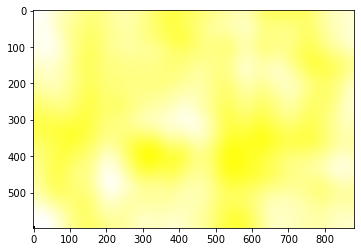

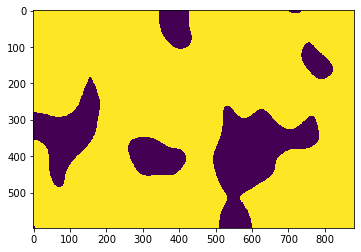

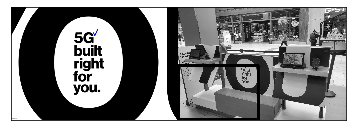

Score before low pass
the coord of the max_loc is : (346, 566) with score of 0.6524461507797241
Score after low pass
the coord of the max_loc is : (0, 0) with score of 0.6444063782691956


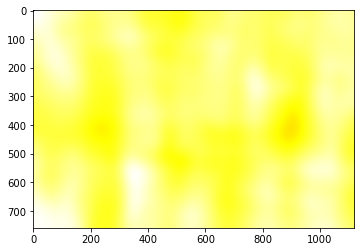

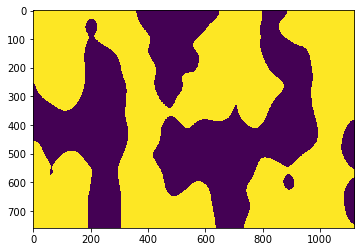

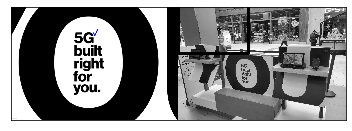

Score before low pass
the coord of the max_loc is : (481, 629) with score of 0.7044669985771179
Score after low pass
the coord of the max_loc is : (485, 625) with score of 0.680578351020813


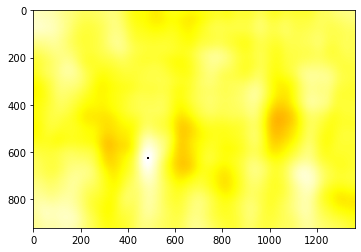

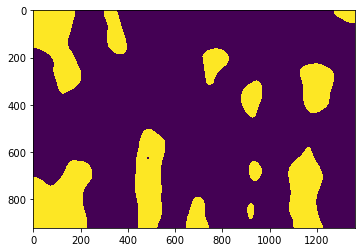

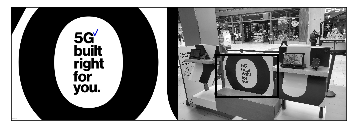

Score before low pass
the coord of the max_loc is : (609, 694) with score of 0.7888695597648621
Score after low pass
the coord of the max_loc is : (609, 700) with score of 0.7567326426506042


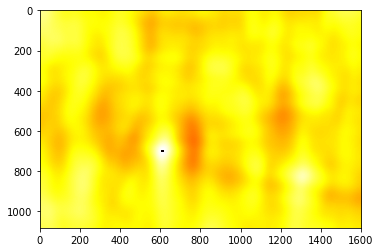

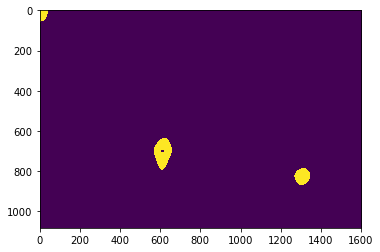

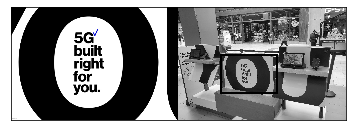

Score before low pass
the coord of the max_loc is : (400, 149) with score of 0.6113634705543518
Score after low pass
the coord of the max_loc is : (196, 205) with score of 0.5965399742126465


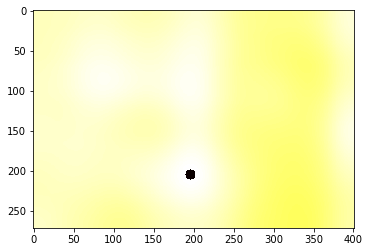

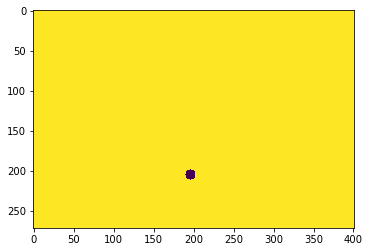

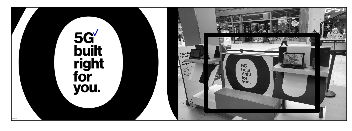

Score before low pass
the coord of the max_loc is : (279, 217) with score of 0.6237319111824036
Score after low pass
the coord of the max_loc is : (284, 213) with score of 0.6139735579490662


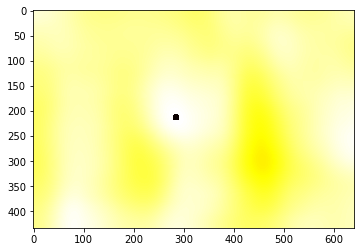

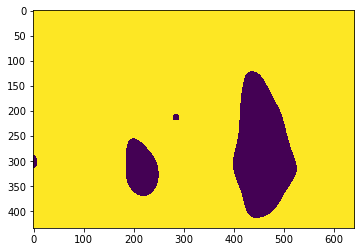

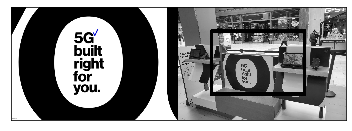

In [28]:
import cv2
import numpy as np 
from img_utils import plot_img_matplotlib,plot_img_matplotlib,Normalize_img_by_min_max
from skimage.transform import resize as skimage_resize 
from template_matching import custom_template_matching_func_for_production
import glob
import os

In [12]:
def template_matching_couple_scales_scene_one_template(scene_path,template_path ,param_scale_ratio_low = 1.5 , param_scale_ratio_high = 3  ,  num_of_samples = 6,show = False,MIN_SCORE_TH = 0.6):

    max_correlation_score = 0
    final_detection_coords = []
    final_detection_img = np.empty([])
   
    scene_rgb = cv2.imread(scene_path)  
    template_rgb = cv2.imread(template_path)

    scene = cv2.imread(scene_path,0)  
    template = cv2.imread(template_path,0) 
    
    h_w_template_array = np.array(template.shape[:2])
    scaling_ratios = np.linspace(param_scale_ratio_low ,param_scale_ratio_high,num_of_samples)
    
    for scale_ratio in scaling_ratios:
        
        h_scene_new , w_scene_new  = np.ceil(scale_ratio * h_w_template_array)
        
        downsampled_scene = skimage_resize(scene.copy(), ( h_scene_new, w_scene_new), anti_aliasing=True )
        downsampled_scene = Normalize_img_by_min_max(downsampled_scene)

        curr_correlation_score, detection_coords, detection_img  = custom_template_matching_func_for_production(downsampled_scene,template,Blur = True)
        
        if curr_correlation_score > max_correlation_score and curr_correlation_score > MIN_SCORE_TH : 

                max_correlation_score = curr_correlation_score
                final_detection_coords = detection_coords
                final_detection_img = detection_img

    if max_correlation_score == 0 :

        print('The template didnt found in the scene or found with not enough correlation score ')

    else: 

        if show : 

            print(max_correlation_score,final_detection_coords)
            plot_img_matplotlib(final_detection_img)

    return max_correlation_score,final_detection_coords ,final_detection_img


0.7567543983459473 [(609, 700), (1409, 1241)]


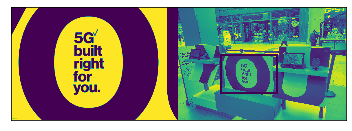

(0.7567543983459473,
 [(609, 700), (1409, 1241)],
 array([[  0,   0,   0, ..., 189, 189, 189],
        [  0,   0,   0, ..., 189, 189, 189],
        [  0,   0,   0, ..., 189, 189, 189],
        ...,
        [254, 254, 254, ..., 162, 161, 161],
        [254, 254, 254, ..., 162, 161, 161],
        [254, 254, 254, ..., 162, 161, 161]], dtype=uint8))

In [19]:


scene_path = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115029.jpg'
scene_path_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115059.jpg'
scene_path_only_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115020.jpg'
template_path = '/home/arpalus/Work_Eldad/Arpalus_Code/Eldad-Local/arpalus-poster_detection/Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters/APPBARBSBMN24x150421.jpg'
template_path_O_ = 'Data_new/planograms/resolution_test/Watchung/APPBARBSEMN39x270421.jpg'

template_matching_couple_scales_scene_one_template(scene_path_O_, template_path_O_,show=True)


0.8906000256538391 [(1170, 429), (1970, 926)]


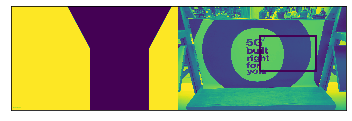

0.7241708636283875 [(209, 116), (1009, 657)]


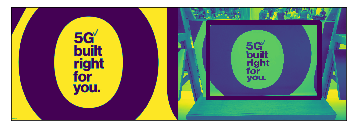

(0.7241708636283875,
 [(209, 116), (1009, 657)],
 array([[  0,   0,   0, ...,  34,  36,  35],
        [  0,   0,   0, ...,  36,  38,  39],
        [  0,   0,   0, ...,  34,  37,  37],
        ...,
        [254, 254, 254, ..., 158, 157, 157],
        [254, 254, 254, ..., 158, 158, 158],
        [254, 254, 254, ..., 160, 159, 159]], dtype=uint8))

In [17]:
# FP , and gt_score < fp_score 
template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path,show = True,MIN_SCORE_TH=0.6) 
template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path_O_,show = True,MIN_SCORE_TH=0.6)
    



The template didnt found in the scene or found with not enough correlation score 
The template didnt found in the scene or found with not enough correlation score 
0.6872005462646484 [(1120, 386), (1920, 927)]


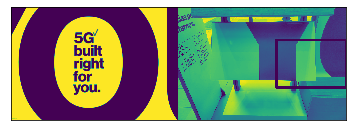

(0.6872005462646484,
 [(1120, 386), (1920, 927)],
 array([[  0,   0,   0, ...,  35,  34,  25],
        [  0,   0,   0, ...,  35,  32,  24],
        [  0,   0,   0, ...,  32,  31,  29],
        ...,
        [254, 254, 254, ...,  77,  78,  75],
        [254, 254, 254, ...,  77,  77,  78],
        [254, 254, 254, ...,  78,  76,  76]], dtype=uint8))

In [25]:
template_matching_couple_scales_scene_one_template(scene_path, template_path_O_,show = True,MIN_SCORE_TH=0.9)
template_matching_couple_scales_scene_one_template(scene_path, template_path_O_,show = True,MIN_SCORE_TH=0.8)
template_matching_couple_scales_scene_one_template(scene_path, template_path_O_,show = True,MIN_SCORE_TH=0.6)



0.9083245992660522 [(492, 175), (1292, 672)]


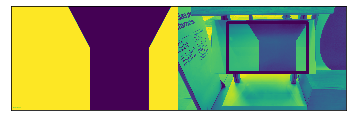

(0.9083245992660522,
 [(492, 175), (1292, 672)],
 array([[255, 255, 255, ...,  31,  36,  26],
        [255, 255, 255, ...,  34,  33,  25],
        [255, 255, 255, ...,  33,  31,  31],
        ...,
        [255, 255, 255, ...,  77,  78,  78],
        [255, 255, 255, ...,  77,  78,  77],
        [255, 255, 255, ...,  78,  76,  76]], dtype=uint8))

In [21]:
template_matching_couple_scales_scene_one_template(scene_path, template_path,show = True,MIN_SCORE_TH=0.7)

0.7868499755859375 [(751, 116), (1551, 436)]


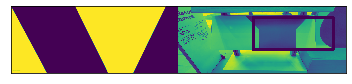

0.9083245992660522 [(492, 175), (1292, 672)]


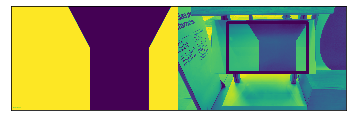

0.9185634851455688 [(1527, 243), (2327, 563)]


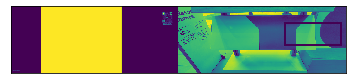

0.8018190860748291 [(1530, 554), (2330, 1051)]


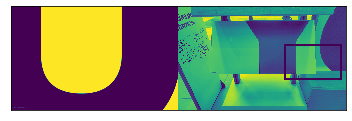

In [29]:

#only hard templates vs some regular scene
for template in sorted(glob.glob('Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters/*.jpg')):
    template_matching_couple_scales_scene_one_template(scene_path, template,show = True,MIN_SCORE_TH=0.7)


---The template didnt found in the scene or found with not enough correlation score---


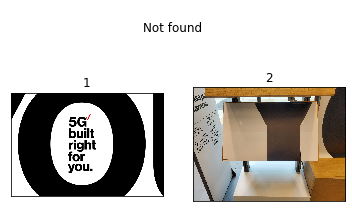

(0, [], array(0.), 0)

In [4]:
import cv2
import numpy as np 
from img_utils import plot_img_matplotlib,plot_img_matplotlib,Normalize_img_by_min_max,plot_two_img_matplotlib
from skimage.transform import resize as skimage_resize 
from template_matching import custom_template_matching_func_for_production

def template_matching_couple_scales_scene_one_template(scene_path,template_path ,param_scale_ratio_low = 1.5 , param_scale_ratio_high = 3  ,  num_of_samples = 6,show = False,MIN_SCORE_TH = 0.6):

    max_correlation_score = 0
    final_number_of_clusters = 0 
    final_detection_coords = []
    final_detection_img = np.empty([])
   
    scene_rgb = cv2.imread(scene_path)  
    template_rgb = cv2.imread(template_path)

    scene = cv2.imread(scene_path,0)  
    template = cv2.imread(template_path,0) 
    
    h_w_template_array = np.array(template.shape[:2])
    scaling_ratios = np.linspace(param_scale_ratio_low ,param_scale_ratio_high,num_of_samples)
    
    for scale_ratio in scaling_ratios:
        
        h_scene_new , w_scene_new  = np.ceil(scale_ratio * h_w_template_array)
        
        downsampled_scene = skimage_resize(scene.copy(), ( h_scene_new, w_scene_new), anti_aliasing=True )
        downsampled_scene = Normalize_img_by_min_max(downsampled_scene)

        curr_correlation_score, detection_coords, detection_img,number_of_clusters  = custom_template_matching_func_for_production(downsampled_scene,template,Blur = True)
        
        if curr_correlation_score > max_correlation_score and curr_correlation_score > MIN_SCORE_TH : 

                max_correlation_score = curr_correlation_score
                final_detection_coords = detection_coords
                final_detection_img = detection_img
                final_number_of_clusters = number_of_clusters

    if max_correlation_score == 0 :

        print('---The template didnt found in the scene or found with not enough correlation score---')

        if show : 

            plot_two_img_matplotlib(template_rgb,scene_rgb,'\nNot found')

    else: 

        if show : 
            print('\n---There is a Detection---\n')    
            print(f'Correlation Score is : {max_correlation_score}')
            print(f'bbox coords are : {final_detection_coords}\n')
            print(f'number of clusters : {final_number_of_clusters}\n')
            plot_img_matplotlib(final_detection_img)

    return max_correlation_score,final_detection_coords,final_detection_img,final_number_of_clusters


scene_path = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115029.jpg'
scene_path_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115059.jpg'
scene_path_only_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115020.jpg'
template_path = '/home/arpalus/Work_Eldad/Arpalus_Code/Eldad-Local/arpalus-poster_detection/Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters/APPBARBSBMN24x150421.jpg'
template_path_O_ = 'Data_new/planograms/resolution_test/Watchung/APPBARBSEMN39x270421.jpg'

# template_matching_couple_scales_scene_one_template(scene_path_O_, template_path_O_)

# FP , and gt_score < fp_score 
#template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path,show = True,MIN_SCORE_TH=0.6) #0.8906000256538391
#template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path_O_,show = True,MIN_SCORE_TH=0.6)

template_matching_couple_scales_scene_one_template(scene_path, template_path_O_,show = True,MIN_SCORE_TH=0.7)



    


---There is a Detection---

Correlation Score is : 0.9083245992660522
bbox coords are : [(492, 175), (1292, 672)]

number of clusters : 0



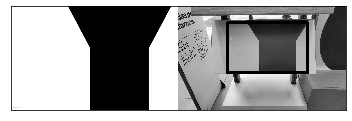

(0.9083245992660522,
 [(492, 175), (1292, 672)],
 array([[255, 255, 255, ...,  31,  36,  26],
        [255, 255, 255, ...,  34,  33,  25],
        [255, 255, 255, ...,  33,  31,  31],
        ...,
        [255, 255, 255, ...,  77,  78,  78],
        [255, 255, 255, ...,  77,  78,  77],
        [255, 255, 255, ...,  78,  76,  76]], dtype=uint8),
 0)

In [5]:
template_matching_couple_scales_scene_one_template(scene_path, template_path,show = True,MIN_SCORE_TH=0.7)


--- current img : 20210604_115020 ---

template name : bottom_U
final_correlation_score : 0.7846578359603882
final_bbox_coords : [(328, 215), (1128, 712)]


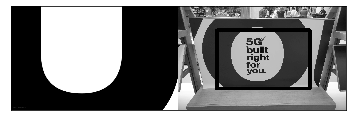


--- current img : 20210604_115025 ---

template name : upper_U
final_correlation_score : 0.7614836692810059
final_bbox_coords : [(1029, 247), (1829, 567)]


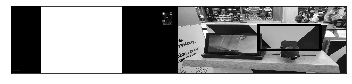


--- current img : 20210604_115029 ---

template name : bottom_Y
final_correlation_score : 0.9083245992660522
final_bbox_coords : [(492, 175), (1292, 672)]


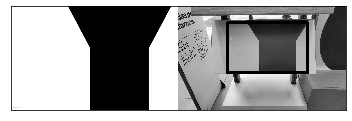


--- current img : 20210604_115034 ---

template name : bottom_Y
final_correlation_score : 0.823176383972168
final_bbox_coords : [(771, 235), (1571, 732)]


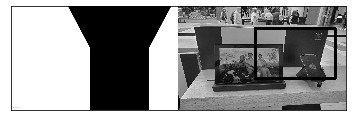


--- current img : 20210604_115043 ---

template name : bottom_U
final_correlation_score : 0.8005092144012451
final_bbox_coords : [(210, 72), (1010, 569)]


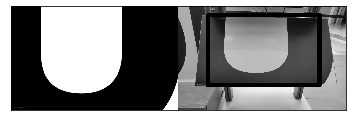


--- current img : 20210604_115047 ---

template name : bottom_Y
final_correlation_score : 0.8268985748291016
final_bbox_coords : [(0, 565), (800, 1062)]


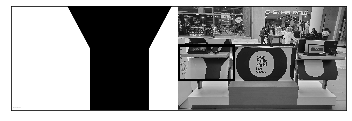


--- current img : 20210604_115051 ---

template name : upper_Y
final_correlation_score : 0.7501559257507324
final_bbox_coords : [(0, 148), (800, 468)]


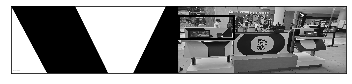


--- current img : 20210604_115059 ---

template name : bottom_Y
final_correlation_score : 0.8209299445152283
final_bbox_coords : [(1506, 655), (2306, 1152)]


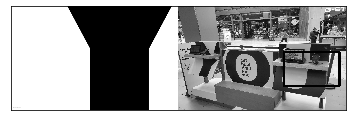

In [1]:
import cv2
from matplotlib.pyplot import plot
import numpy as np 
from img_utils import plot_img_matplotlib,plot_img_matplotlib,Normalize_img_by_min_max,plot_two_img_matplotlib
from skimage.transform import resize as skimage_resize 
from template_matching import custom_template_matching_func_for_production
import glob
import os 

def template_matching_couple_scales_scene_one_template(scene_path,template_path ,param_scale_ratio_low = 1.5 , param_scale_ratio_high = 3  ,  num_of_samples = 6,show = False,MIN_SCORE_TH = 0.6):

    max_correlation_score = 0
    final_number_of_clusters = 0 
    final_detection_coords = []
    final_detection_img = np.empty([])
   
    scene_rgb = cv2.imread(scene_path)  
    template_rgb = cv2.imread(template_path)

    scene = cv2.imread(scene_path,0)  
    template = cv2.imread(template_path,0) 
    
    h_w_template_array = np.array(template.shape[:2])
    scaling_ratios = np.linspace(param_scale_ratio_low ,param_scale_ratio_high,num_of_samples)
    
    for scale_ratio in scaling_ratios:
        
        h_scene_new , w_scene_new  = np.ceil(scale_ratio * h_w_template_array)
        
        downsampled_scene = skimage_resize(scene.copy(), ( h_scene_new, w_scene_new), anti_aliasing=True )
        downsampled_scene = Normalize_img_by_min_max(downsampled_scene)

        curr_correlation_score, detection_coords, detection_img,number_of_clusters  = custom_template_matching_func_for_production(downsampled_scene,template,Blur = True)
        
        if curr_correlation_score > max_correlation_score and curr_correlation_score > MIN_SCORE_TH : 

                max_correlation_score = curr_correlation_score
                final_detection_coords = detection_coords
                final_detection_img = detection_img
                final_number_of_clusters = number_of_clusters

    if max_correlation_score == 0 :

        print('---The template didnt found in the scene or found with not enough correlation score---')

        if show : 

            plot_two_img_matplotlib(template_rgb,scene_rgb,'\nNot found')

    else: 

        if show : 
            print('\n---There is a Detection---\n')    
            print(f'Correlation Score is : {max_correlation_score}')
            print(f'bbox coords are : {final_detection_coords}\n')
            print(f'number of clusters : {final_number_of_clusters}\n')
            plot_img_matplotlib(final_detection_img)

    return max_correlation_score,final_detection_coords,final_detection_img,final_number_of_clusters



def run_template_matching_on_various_templates(templates_dir_path,scene_path,show_ = False):
    
    min_number_of_clusters = np.inf 
    final_detection_image = np.empty([])
    final_bbox_coords = []
    final_correlation_score = 0
    final_template_name = ''

    for template_path in sorted(glob.glob(templates_dir_path +'/*.jpg')):

        curr_max_correlation_score,curr_detection_coords,curr_detection_img,curr_number_of_clusters = template_matching_couple_scales_scene_one_template(scene_path, template_path,show = False,MIN_SCORE_TH=0.5)
        
        curr_number_of_clusters = curr_number_of_clusters if curr_number_of_clusters is not None else min_number_of_clusters

        if curr_number_of_clusters < min_number_of_clusters :
            
            min_number_of_clusters = curr_number_of_clusters
            
            final_correlation_score = curr_max_correlation_score
            final_bbox_coords  = curr_detection_coords
            final_detection_image = curr_detection_img
            final_template_name = os.path.basename(template_path)[:-len('.jpg')]

    if show_ : 
        
        if final_correlation_score != 0:
            print(f'template name : {final_template_name}')
            print(f'final_correlation_score : {final_correlation_score}')
            print(f'final_bbox_coords : {final_bbox_coords}')
            
            if len(final_detection_image.shape) != 0 : 
                plot_img_matplotlib(final_detection_image)

    return final_correlation_score,final_bbox_coords,final_detection_image,final_template_name

def main(): 

    scene_path = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115029.jpg'
    scene_path_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115059.jpg'
    scene_path_only_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115020.jpg'
    template_path = '/home/arpalus/Work_Eldad/Arpalus_Code/Eldad-Local/arpalus-poster_detection/Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters/APPBARBSBMN24x150421.jpg'
    template_path_O_ = 'Data_new/planograms/resolution_test/Watchung/APPBARBSEMN39x270421.jpg'

    # template_matching_couple_scales_scene_one_template(scene_path_O_, template_path_O_)

    # FP , and gt_score < fp_score 
    #template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path,show = True,MIN_SCORE_TH=0.6) #0.8906000256538391
    #template_matching_couple_scales_scene_one_template(scene_path_only_O_, template_path_O_,show = True,MIN_SCORE_TH=0.6)
    
    # template_matching_couple_scales_scene_one_template(scene_path, template_path_O_,show = True,MIN_SCORE_TH=0.7)
    # template_matching_couple_scales_scene_one_template(scene_path, template_path,show = True,MIN_SCORE_TH=0.7)


#### one scene several templates ##### 

    TEMPLATES_DIR_PATH = 'Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters'
    
    # run_template_matching_on_various_templates(TEMPLATES_DIR_PATH,scene_path,show_=True)


#### all scene all template - final exp ####
    
    SCENE_IMAGES_DIR_PATH = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images'
    for scene_path in sorted(glob.glob( SCENE_IMAGES_DIR_PATH + '/*.jpg')):

        scene_name = os.path.basename(scene_path)[:-len('.jpg')]
        print(f'\n--- current img : {scene_name} ---\n')
        run_template_matching_on_various_templates(TEMPLATES_DIR_PATH,scene_path,show_ = True)


if __name__ == "__main__":

    main()
    